In [1]:
import os

from ray import tune

from ptgnn.runtime_config.config import import_as, export_as
from ptgnn.runtime_config.config_helpers import run_config_adapter, load_and_merge_default_configs

In [2]:
storage_path = "C:/Users/johan/ray_results/"
exp_name = "trainable_function_2024-03-27_15-37-53"

In [3]:
experiment_path = os.path.join(storage_path, exp_name)
print(f"Loading results from {experiment_path}...")

Loading results from C:/Users/johan/ray_results/trainable_function_2024-03-27_15-37-53...


In [4]:
def trainable_function(config):
    run_config_adapter(
        config,
        default_config={},
        report=True,
        verbose=False,
        device=None
    )

In [22]:
restored_tuner = tune.Tuner.restore(experiment_path, trainable=trainable_function)
results = restored_tuner.get_results()

In [23]:
results

ResultGrid<[
  Result(
    metrics={'train_accuracy': 1.0, 'train_precision': 1.0, 'train_recall': 1.0, 'train_f1': 1.0, 'train_auc': 1.0, 'train_mean_loss': 1.571663354090957e-05, 'train_sum_loss': 0.0049035896647637855, 'val_accuracy': 1.0, 'val_precision': 1.0, 'val_recall': 1.0, 'val_f1': 1.0, 'val_auc': 1.0, 'val_mean_loss': 1.052817188260938e-05, 'val_sum_loss': 0.003295317799256736},
    path='C:/Users/johan/ray_results/trainable_function_2024-03-27_13-07-44/trainable_function_8c786585_1_times=1_2024-03-27_13-07-48',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'train_accuracy': 1.0, 'train_precision': 1.0, 'train_recall': 1.0, 'train_f1': 1.0, 'train_auc': 1.0, 'train_mean_loss': 5.149602006399735e-06, 'train_sum_loss': 0.0016066758259967173, 'val_accuracy': 1.0, 'val_precision': 1.0, 'val_recall': 1.0, 'val_f1': 1.0, 'val_auc': 1.0, 'val_mean_loss': 4.991494208955958e-06, 'val_sum_loss': 0.0015623376874032147},
    path='C:/Users/johan/ray_results/tr

In [24]:
results.get_dataframe()

,train_accuracy,train_precision,train_recall,train_f1,train_auc,train_mean_loss,train_sum_loss,val_accuracy,val_precision,val_recall,...,date,time_this_iter_s,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/model/modules/1/times,logdir
0,1.0,1.0,1.0,1.0,1.0,0.000016,0.004904,1.0,1.0,1.0,...,2024-03-27_13-13-51,77.716031,358.005894,72652,AT-MB-PC-E13,127.0.0.1,358.005894,4,1,8c786585
1,1.0,1.0,1.0,1.0,1.0,0.000005,0.001607,1.0,1.0,1.0,...,2024-03-27_13-17-31,136.835203,572.685076,33296,AT-MB-PC-E13,127.0.0.1,572.685076,4,3,59dfdd29
2,1.0,1.0,1.0,1.0,1.0,0.000016,0.004904,1.0,1.0,1.0,...,2024-03-27_13-19-44,80.343259,352.335147,72652,AT-MB-PC-E13,127.0.0.1,352.335147,4,1,57516cc1
3,1.0,1.0,1.0,1.0,1.0,0.000007,0.002065,1.0,1.0,1.0,...,2024-03-27_13-28-25,162.061533,654.097617,33296,AT-MB-PC-E13,127.0.0.1,654.097617,4,3,b0bb4e23
4,1.0,1.0,1.0,1.0,1.0,0.000015,0.004680,1.0,1.0,1.0,...,2024-03-27_13-28-48,125.257540,543.576355,72652,AT-MB-PC-E13,127.0.0.1,543.576355,4,2,ffa93e89
5,1.0,1.0,1.0,1.0,1.0,0.000015,0.004680,1.0,1.0,1.0,...,2024-03-27_13-37-42,126.576709,555.806898,33296,AT-MB-PC-E13,127.0.0.1,555.806898,4,2,90721da4
6,1.0,1.0,1.0,1.0,1.0,0.000008,0.002631,1.0,1.0,1.0,...,2024-03-27_13-43-11,212.295372,861.316045,72652,AT-MB-PC-E13,127.0.0.1,861.316045,4,4,4cd9ac54
7,1.0,1.0,1.0,1.0,1.0,0.000008,0.002630,1.0,1.0,1.0,...,2024-03-27_13-49-16,139.040389,693.272027,33296,AT-MB-PC-E13,127.0.0.1,693.272027,4,4,4b6eb48b


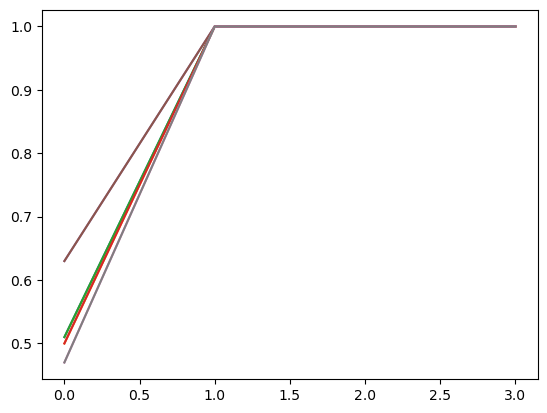

In [25]:
dfs = {result.path: result.metrics_dataframe for result in results}
# Plot by epoch
ax = None  # This plots everything on the same plot
for d in dfs.values():
    ax = d.val_accuracy.plot(ax=ax, legend=False)

## Storing results

In [26]:
# fetching config file
benchmark_config = import_as("configs/hyper_param_opt/benchmark_instructions_rs_ptree_default.yaml")
display(benchmark_config)

{'output_dir': 'results/ptree/default',
 'config_files': ['configs/hyper_param_opt/subsetting.yaml',
  'configs/hyper_param_opt/epoch_reduction.yaml',
  'configs/datasets/rs_dataset.yaml',
  'configs/models/ptree_default.yaml',
  'configs/general.yaml'],
 'search_space': {'model': {'modules': {1: {'times': 'tune.randint(1,6)'}}}},
 'hyper_settings': {'scheduler': {'grace_period': 2,
   'reduction_factor': 3,
   'brackets': 1},
  'max_concurrent_trials': 2,
  'num_samples': 8,
  'stopper': {'num_results': 3, 'metric_threshold': 0.98}}}

In [27]:
output_path = benchmark_config['output_dir']

# make sure that output_dir exists
if not os.path.exists(output_path):
    os.mkdir(output_path)

In [28]:
default_config = load_and_merge_default_configs(
    benchmark_config['config_files']
)
display(default_config)

{'data': {'subset_size': 10000,
  'dataset': {'type': 'rs',
   'mask_chiral_tasks': True,
   'graph_mode': 'edge',
   'transformation_mode': 'permutation_tree',
   'transformation_parameters': {'k': 3}},
  'loader': {'general': {'n_neighbors_in_circle': 3,
    'batch_size': 32,
    'num_workers': 0},
   'train': {'sampler': 'single_conformer_sampler'},
   'val': {'sampler': 'full_batch'},
   'test': {'sampler': 'full_batch'}}},
 'training': {'n_max_epochs': 10,
  'loss_function': 'cross_entropy',
  'optimization_metric': 'accuracy',
  'optimization_metric_mode': 'max',
  'task_type': 'classification',
  'clip_grad_norm': True},
 'model': {'out_dim': 1,
  'mode': 'custom',
  'hidden_dim': 128,
  'modules': {0: {'type': 'graph_embedding',
    'parameter': {'node_type': 'linear', 'edge_type': 'linear'}},
   1: {'type': 'gps_layer',
    'parameter': {'local_model': 'permutation_tree',
     'local_model_params': {'k': 3}},
    'times': 5}},
  'head': {'type': 'san_head', 'n_layer': 3, 'pool

In [29]:
# create absolute path to root dict that is not hyper-opt-run specific
default_config['data']['dataset']['root'] = os.path.abspath(
    os.path.join("src", default_config['data']['dataset']['type'])
)

In [30]:
# currently limit number of epochs
default_config['training']['n_max_epochs'] = 3

In [31]:
display(default_config)

{'data': {'subset_size': 10000,
  'dataset': {'type': 'rs',
   'mask_chiral_tasks': True,
   'graph_mode': 'edge',
   'transformation_mode': 'permutation_tree',
   'transformation_parameters': {'k': 3},
   'root': 'D:\\DATEN\\Masterarbeit_PTGNN\\notebooks\\hyperoptimization\\src\\rs'},
  'loader': {'general': {'n_neighbors_in_circle': 3,
    'batch_size': 32,
    'num_workers': 0},
   'train': {'sampler': 'single_conformer_sampler'},
   'val': {'sampler': 'full_batch'},
   'test': {'sampler': 'full_batch'}}},
 'training': {'n_max_epochs': 3,
  'loss_function': 'cross_entropy',
  'optimization_metric': 'accuracy',
  'optimization_metric_mode': 'max',
  'task_type': 'classification',
  'clip_grad_norm': True},
 'model': {'out_dim': 1,
  'mode': 'custom',
  'hidden_dim': 128,
  'modules': {0: {'type': 'graph_embedding',
    'parameter': {'node_type': 'linear', 'edge_type': 'linear'}},
   1: {'type': 'gps_layer',
    'parameter': {'local_model': 'permutation_tree',
     'local_model_params

In [32]:
# save general configs
export_as(default_config, os.path.join(output_path, "general_config.yaml"), save_type='yaml')

In [33]:
# save results dataframe
results.get_dataframe().to_csv(os.path.join(output_path, "results.csv"), index=None)

In [34]:
# for each trial save results
for result in results:
    # get metrics
    trial_metrics = result.metrics_dataframe

    # get trial id
    trial_id = trial_metrics.trial_id[0]

    # get config
    trial_config = result.config

    # saving
    trial_metrics.to_csv(os.path.join(output_path, f"{trial_id}.csv"), index=None)
    export_as(trial_config, os.path.join(output_path, f"{trial_id}.yaml"), save_type='yaml')